In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

### Prepare the data

In [4]:
from helpers import standardize

def prepare(x):
    """
    Prepare the data by standardizing and replacing unused 
    values (-999) by the mean of their columns such that they
    don't affect the computation then.
    """
    # Here we put the non sense values (-999) to 0 or mean 
    # such that they don't affect too much the prediction then
    xt = np.copy(x.T)
    for xi in xt:
        xi[xi==-999] = np.nan
        #m = np.nanmean(xi)
        nanidx = np.where(np.isnan(xi))
        xi[nanidx] = 0
        
    tx, mean, std = standardize(xt.T)
    
    return tx        


tx = prepare(tX)

In [32]:
from helpers import standardize

def prepareWithoutNull(tx):
    
    nullValue = .999
    for i in range(0, tx): 
        

SyntaxError: unexpected EOF while parsing (<ipython-input-32-0470105437ad>, line 7)

### Exploratory data analysis

In [40]:
rows, features = tx.shape
print('Number of data entries:', rows)
print('Number of feature:', features)
print(tx.shape)
print(tx[:, 1].shape)
print(y)

Number of data entries: 250000
Number of feature: 31
(250000, 31)
(250000,)
[ 1. -1. -1. ...,  1. -1. -1.]


[ 1.  1.  1. ...,  1.  1.  1.]


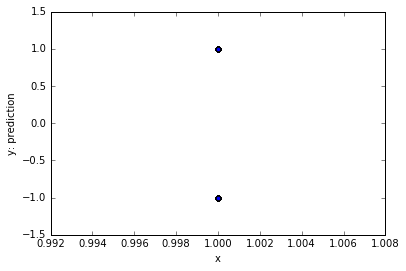

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
feature1 = tx[:, 0]
print(feature1)
plt.scatter(feature1, y)
plt.xlabel('x')
plt.ylabel('y: prediction')
plt.show()

In [ ]:
for f in range(0, 0):
    featureData = tx[:, f]
    plt.scatter(featureData, y)
    plt.xlabel('x')
    plt.ylabel('y: prediction')
    plt.show()

### Exploratory data comments

For feature : 

    4-  > 40 =>  1
    5-  > 6  =>  1
    
    1-  > 20 => -1 [10,20] => more likely to be -1
    3-  > 20 => -1
    21- > 10 => -1
    26- > 22 => -1
    29- > 13 => -1
    

## Process the Machine Learning

#### Differents learning methods

In [22]:
from least_squares import *
from regression import *

def learn_with(method, y, tx, gamma=0.05, max_iters=10, lambda_=0.1):
    
    initial_w, loss = least_squares(y, tx)
    
    if method == 'least_square_GD': 
        return least_squares_GD(y, tx, initial_w, max_iters, gamma)

    if method == 'least_square_SGD': 
        return least_squares_SGD(y, tx, initial_w, max_iters, gamma)

    if method == 'logistic_regression': 
        return logistic_regression(y, tx, initial_w, max_iters, gamma)

    if method == 'reg_logistic_regression': 
        return reg_logisitic_regression(y, tx, lambda_, initial_w, max_iters, gamma)
    
    if method == 'ridge_regression': 
        return ridge_regression(y, tx, lambda_)
    
    return initial_w, loss

IndentationError: unindent does not match any outer indentation level (least_squares.py, line 18)

#### Training phase

In [23]:
def compare_least_squares(y, tx):
    w3, l3 = learn_with("least_square", y, tx)
    w2, l2 = learn_with("least_square_GD", y, tx, 0.15, 50)
    w1, l1 = learn_with("least_square_SGD", y, tx, 0.5, 50)
    print("SGD")
    print(l1)
    print(w1)
    print("GD")
    print(l2)
    print(w2)
    print("--")
    print(l3)
    print(w3)
    

In [36]:
def compare_regression(y, tx):
    #w1, l1 = learn_with('logistic_regression', y, tx)
    #print("Log reg")
    #print(l1)
    #print(w1)
    #print(compute_loss(y, tx, w1))
    w2, l2 = learn_with('reg_logistic_regression', y, tx, 0.05, 200, 0.01)
    print("Reg Log reg")
    print(l2)
    print(w2)
    print(compute_loss(y, tx, w2))
    #w3, l3 = learn_with("ridge_regression", y, tx)
    #print("Ridge reg")
    #print(calculate_nll(y, tx, w3))
    #print(l3)
    #print(w3)

In [37]:
def train(y, tx):
    
    w, loss = learn_with("least_square_GD", y, tx)
    
    return w, loss

#loss, weights = train(y, tx)
#compare_least_squares(y, tx)
compare_regression(y, tx)
#w, l = least_squares(y, tx)
#print(calculate_nll(y, tx, w))


Iter 0 loss = -28894.6441459
Iter 20 loss = 374276.774368
Iter 40 loss = 664327.781196
Iter 60 loss = 939727.66427
Iter 80 loss = 1210584.90141
Iter 100 loss = 1479396.88448
Iter 120 loss = 1747121.42199
Iter 140 loss = 2014218.72008
Iter 160 loss = 2280938.53153
Iter 180 loss = 2547432.66454
Reg Log reg
2800482.37759
[ -1.71324623e+01   1.44109456e+00  -6.85651447e+00  -8.99558800e+00
   1.56071858e+00  -6.69838947e-01   2.28312029e+00  -2.21835037e-01
   9.04956781e+00   2.42276523e-01  -3.04427020e+00  -7.17352292e+00
   2.97479378e+00   2.33836828e+00   4.41000573e+00  -2.48204114e-02
  -2.25337838e-02   9.46913793e+00  -2.03262221e-02   5.49717851e-02
   1.17916752e+00  -9.29419340e-04  -1.76741903e+00   1.00868565e+00
   5.27124878e+00   1.20649075e-03  -7.10798486e-03   1.41779551e+00
   4.02311479e-02  -4.18461567e-02  -6.42056426e+00]
228.478258726


Regression is still doing some shit but at least it don't crash.. Maybie a problem with loss computation ? 

## Generate predictions and save ouput in csv format for submission:

In [10]:
loss, weights = learn_with("least_square_GD", y, tx)
print(weights)

NameError: name 'learn_with' is not defined

In [9]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

print(tX_test.shape)

tx_Test_norm = prepare(tX_test)
print(tx_Test_norm.shape)


(568238, 30)
(250000, 31)


In [7]:
OUTPUT_PATH = '../output/out.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx_Test_norm)
print(y_pred.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined